<a href="https://colab.research.google.com/github/antussa2016/Data_mining/blob/master/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import wordcloud as WordCloud

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import  classification_report, accuracy_score


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/Fake.csv")

In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake['subject'].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

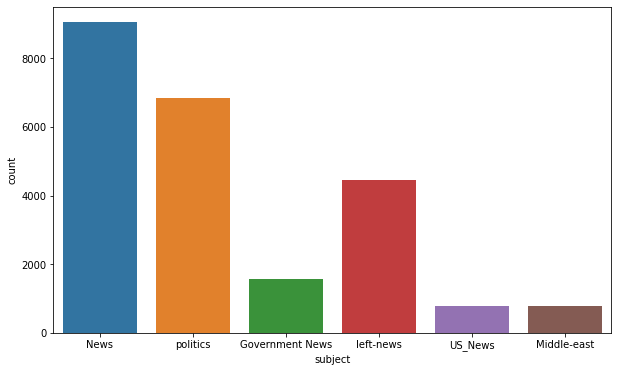

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(x='subject', data=fake)

# **Wordcloud** 

In [ ]:
text=' '.join(fake['text'].tolist())
type(text)

str

In [ ]:
' '.join(['i','am','antu'])

'i am antu'

In [ ]:
wordCloud = WordCloud.WordCloud(width=1920,height=1000).generate(text)


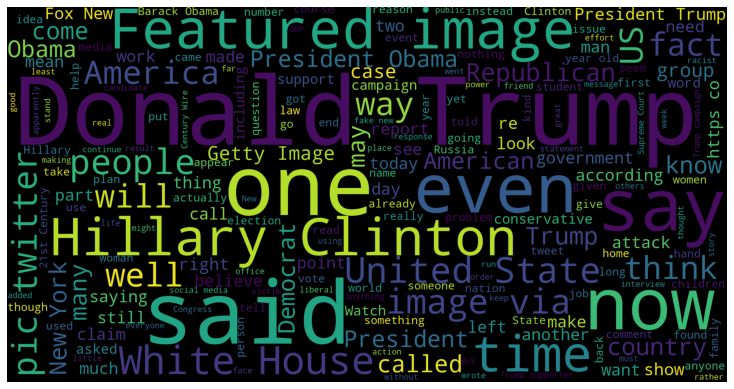

In [ ]:
fig=plt.figure(figsize=(10,6))
plt.imshow(wordCloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Explore Real news

In [ ]:
real = pd.read_csv("/content/drive/MyDrive/True.csv")
text=' '.join(real['text'].tolist())

In [ ]:
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
wordCloud = WordCloud.WordCloud(width=1920,height=1000).generate(text)

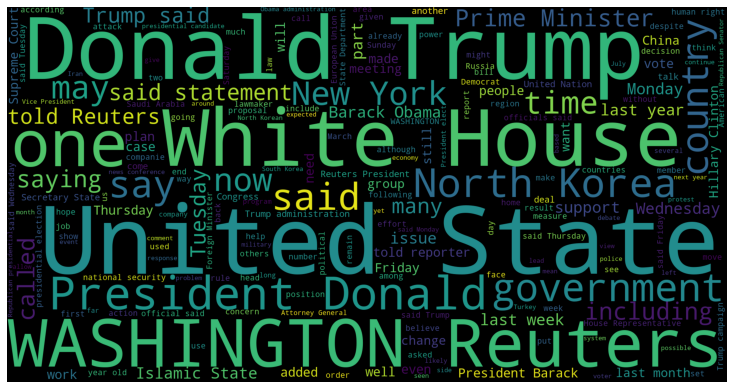

In [ ]:
fig=plt.figure(figsize=(10,6))
plt.imshow(wordCloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
real.sample(5)

,title,text,subject,date
8198,Obama to host Italy's Renzi for state visit Oc...,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"September 12, 2016"
2333,Trump and senators seek to slash legal immigra...,WASHINGTON/NEW YORK (Reuters) - After a crackd...,politicsNews,"August 2, 2017"
17168,Britain says chances of resolving Northern Ire...,LONDON (Reuters) - The chances of Northern Ire...,worldnews,"October 18, 2017"
12078,Erdogan says Turkey aims to open embassy in Ea...,ISTANBUL (Reuters) - Turkey intends to open an...,worldnews,"December 17, 2017"
18482,U.S. travel restrictions jeopardize rare excha...,SAN FRANCISCO (Reuters) - When more than a doz...,worldnews,"October 2, 2017"


In [ ]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
  try:
    record = row.split('-', maxsplit=1)
    record[1]

    assert(len(record[0])<120)

  except:
    unknown_publishers.append(index)

In [ ]:
len(unknown_publishers)

222

In [ ]:
real.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
real.iloc[8970]

title      Graphic: Supreme Court roundup
text                                     
subject                      politicsNews
date                       June 16, 2016 
Name: 8970, dtype: object

In [ ]:
real= real.drop(8970,axis=0)

In [ ]:
publisher=[]
tmp_text=[]

for index, row in enumerate(real.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
    continue
  else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [ ]:
real['publisher']=publisher
real['text']=tmp_text

In [ ]:
real.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
real.shape

(21416, 5)

In [ ]:
empty_fake_index=[index for index, text in enumerate(fake.text.tolist()) if str(text).strip()==""]

In [ ]:
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
real['text']=real['title']+" "+real['text']
fake['text']=fake['title']+" "+fake['text']

In [ ]:
real['text']=real['text'].apply(lambda x: str(x).lower())
fake['text']=fake['text'].apply(lambda x: str(x).lower())


# Processing text

In [ ]:
real['class']=1
fake['class']=0

In [ ]:
real.columns

Index(['title', 'text', 'subject', 'date', 'publisher', 'class'], dtype='object')

In [ ]:
real = real[['text','class']]

In [ ]:
fake = fake[['text','class']]

In [ ]:
data = real.append(fake, ignore_index=True)

In [ ]:
data.sample(5)

,text,class
2492,u.s. lawmakers reach deal for senate vote on r...,1
11253,"obama, jordan's king abdullah hold meeting at ...",1
2477,boy scouts of america apologizes for trump's '...,1
3118,cftc poised to lose sole democratic commission...,1
382,factbox: republican side-deals build support f...,1


In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

     |████████████████████████████████| 10.4 MB 4.7 MB/s 
     |████████████████████████████████| 2.2 MB 34.8 MB/s 
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4
     |████████████████████████████████| 12.0 MB 5.3 MB/s 
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
     |████████████████████████████████| 115 kB 5.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-p2yo0voj
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip

In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['text']=data['text'].apply(lambda x:ps.remove_special_chars(x))

In [ ]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


# Word2Vector

In [ ]:
import gensim

In [ ]:
y=data['class'].values

In [ ]:
X= [d.split() for d in data['text'].tolist()]

In [ ]:
type(X[0])

list

In [ ]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [ ]:
DIM=100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

231872

In [ ]:
w2v_model.wv.most_similar('bangladesh')

[('rohingya', 0.7947399616241455),
 ('myanmar', 0.723570704460144),
 ('bazar', 0.7087230086326599),
 ('bangladeshi', 0.6629041433334351),
 ('dhaka', 0.6617482900619507),
 ('camps', 0.6403802633285522),
 ('rohingyas', 0.6376247406005859),
 ('refugees', 0.6339392066001892),
 ('buddhists', 0.623718798160553),
 ('600000', 0.6140767335891724)]

In [ ]:
tokenizer= Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X=tokenizer.texts_to_sequences(X)

In [ ]:
#tokenizer.word_index

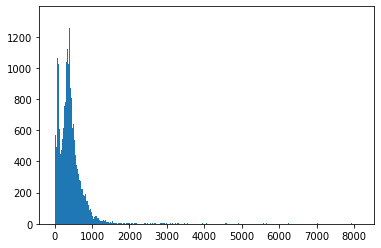

In [ ]:
plt.hist([len(x)for x in X], bins=700 )
plt.show()

In [ ]:
nos=np.array([len(x) for x in X])
len(nos[nos>1000])

1581

In [ ]:
maxlen=1000
X=pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[1])

1000

In [ ]:
vocab_size = len(tokenizer.word_index)+1
vocab=tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_marix= np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_marix[i]= model.wv[word]

  return weight_marix



In [ ]:
embedding_vectors=get_weight_matrix(w2v_model)

In [ ]:
embedding_vectors.shape

(231873, 100)

# Mechine learning Model

In [ ]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=DIM,weights=[embedding_vectors], input_length=maxlen,trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 1000, 100)         23187300  
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 23,304,677
Trainable params: 117,377
Non-trainable params: 23,187,300
_________________________________________________________________


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [ ]:
model.fit(x_train,y_train,validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 125s 161ms/step - loss: 0.1414 - acc: 0.9473 - val_loss: 0.0920 - val_acc: 0.9672
Epoch 2/6
737/737 [==============================] - 118s 160ms/step - loss: 0.0651 - acc: 0.9776 - val_loss: 0.0410 - val_acc: 0.9860
Epoch 3/6
737/737 [==============================] - 118s 161ms/step - loss: 0.0271 - acc: 0.9910 - val_loss: 0.0292 - val_acc: 0.9917
Epoch 4/6
737/737 [==============================] - 119s 161ms/step - loss: 0.0201 - acc: 0.9936 - val_loss: 0.0287 - val_acc: 0.9911
Epoch 5/6
737/737 [==============================] - 119s 162ms/step - loss: 0.0098 - acc: 0.9969 - val_loss: 0.0300 - val_acc: 0.9901
Epoch 6/6
737/737 [==============================] - 119s 161ms/step - loss: 0.0062 - acc: 0.9982 - val_loss: 0.0263 - val_acc: 0.9923


In [ ]:
y_pred=(model.predict(x_test) >= 0.5).astype(int)

In [ ]:
accuracy_score(y_test, y_pred)

0.9936748329621381

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5886
           1       1.00      0.99      0.99      5339

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



# Real News testing

Fake news

In [ ]:
x=['name is antu']


In [ ]:
x=tokenizer.texts_to_sequences(x)

In [ ]:
x=pad_sequences(x, maxlen=maxlen)
(model.predict(x) >= 0.5).astype(int)

array([[1]])

real news

In [ ]:
x=['']


In [ ]:
x = ['Russia registered its fifth coronavirus vaccine, EpiVacCorona-N, Interfax reported. The Health Ministry said it was an upgrade on the already-approved EpiVacCorona jab, which had been under scrutiny after clinical trial participants raised questions about the vaccine’s effectiveness. Both were developed by the state-run Vector Institute.']

In [ ]:
x=tokenizer.texts_to_sequences(x)

In [ ]:
x=pad_sequences(x, maxlen=maxlen)

In [ ]:
(model.predict(x) >= 0.5).astype(int)

array([[1]])